In [1]:
!nvidia-smi

Fri Jun 09 16:18:45 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 451.67       Driver Version: 451.67       CUDA Version: 11.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  GeForce GTX 1650   WDDM  | 00000000:01:00.0  On |                  N/A |
| N/A   46C    P8     2W /  N/A |   1155MiB /  4096MiB |      2%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                                  |
|  GPU  

In [81]:
#!pip install wordcloud

In [2]:
import pandas as pd

In [91]:
train_data= pd.read_json('./model_train/traindata.json', lines=True)

In [92]:
train_data.head()

content   
0  Afreen Jamadar\nActive member of IIIT Committe...  \
1  Alok Khandai\nOperational Analyst (SQL DBA) En...   
2  Anvitha Rao\nAutomation developer\n\n- Email m...   
3  arjun ks\nSenior Program coordinator - oracle ...   
4  Arun Elumalai\nQA Tester\n\nChennai, Tamil Nad...   

                                          annotation  extras   
0  [{'label': ['Email Address'], 'points': [{'sta...     NaN  \
1  [{'label': ['Skills'], 'points': [{'start': 80...     NaN   
2  [{'label': ['Links'], 'points': [{'start': 288...     NaN   
3  [{'label': ['Skills'], 'points': [{'start': 50...     NaN   
4  [{'label': ['Skills'], 'points': [{'start': 19...     NaN   

                                            metadata  
0  {'first_done_at': 1527844872000, 'last_updated...  
1  {'first_done_at': 1527845028000, 'last_updated...  
2  {'first_done_at': 1527744637000, 'last_updated...  
3  {'first_done_at': 1527834843000, 'last_updated...  
4  {'first_done_at': 1527847268000, 'last_updated...

In [82]:
#train_data['annotation'][699]

[{'label': ['Links'],
  'points': [{'start': 6274,
    'end': 6325,
    'text': 'https://in.linkedin.com/in/sakshi-sundriyal-b2620715'}]},
 {'label': ['Links'],
  'points': [{'start': 6220,
    'end': 6271,
    'text': 'https://in.linkedin.com/in/sakshi-sundriyal-b2620715'}]},
 {'label': ['Skills'],
  'points': [{'start': 6172, 'end': 6192, 'text': 'BUSINESS DEVELOPMENT '}]},
 {'label': ['Skills'],
  'points': [{'start': 6138, 'end': 6150, 'text': 'BUSINESS CASE'}]},
 {'label': ['Skills'],
  'points': [{'start': 6108, 'end': 6116, 'text': 'BUDGETING'}]},
 {'label': ['Skills'],
  'points': [{'start': 6069, 'end': 6086, 'text': 'ACCOUNT MANAGEMENT'}]},
 {'label': ['Skills'],
  'points': [{'start': 6045, 'end': 6056, 'text': 'KEY ACCOUNTS'}]},
 {'label': ['College'],
  'points': [{'start': 5987, 'end': 6002, 'text': 'Delhi University'}]},
 {'label': ['Degree'],
  'points': [{'start': 5971, 'end': 5984, 'text': 'BSc in Physics'}]},
 {'label': ['Location'],
  'points': [{'start': 5935, 'end

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

In [20]:
# Extract all label values
labels = []
for row in train_data['annotation']:
    if row is not None:
        for annotation in row:
            if 'label' in annotation and len(annotation['label']) > 0:
                label = annotation['label'][0]
                labels.append(label)

In [21]:
print(labels)

['Email Address', 'Links', 'Skills', 'Graduation Year', 'College Name', 'Degree', 'Graduation Year', 'College Name', 'Degree', 'Companies worked at', 'Email Address', 'Location', 'Name', 'Skills', 'Skills', 'Graduation Year', 'College Name', 'College Name', 'Companies worked at', 'Location', 'Companies worked at', 'Designation', 'Designation', 'projects', 'Companies worked at', 'Email Address', 'Companies worked at', 'Designation', 'Skills', 'Years of Experience', 'Location', 'Companies worked at', 'Designation', 'Location', 'Skills', 'Email Address', 'Location', 'Companies worked at', 'Designation', 'Name', 'Links', 'Skills', 'Skills', 'Skills', 'Skills', 'Links', 'Skills', 'Skills', 'Skills', 'Skills', 'Skills', 'Graduation Year', 'Location', 'College Name', 'Degree', 'Graduation Year', 'College Name', 'Degree', 'Email Address', 'Skills', 'Graduation Year', 'Graduation Year', 'Location', 'Companies worked at', 'Graduation Year', 'Location', 'Companies worked at', 'Designation', 'Can 

In [23]:
# Count the occurrences of each label
label_counts = pd.Series(labels).value_counts()

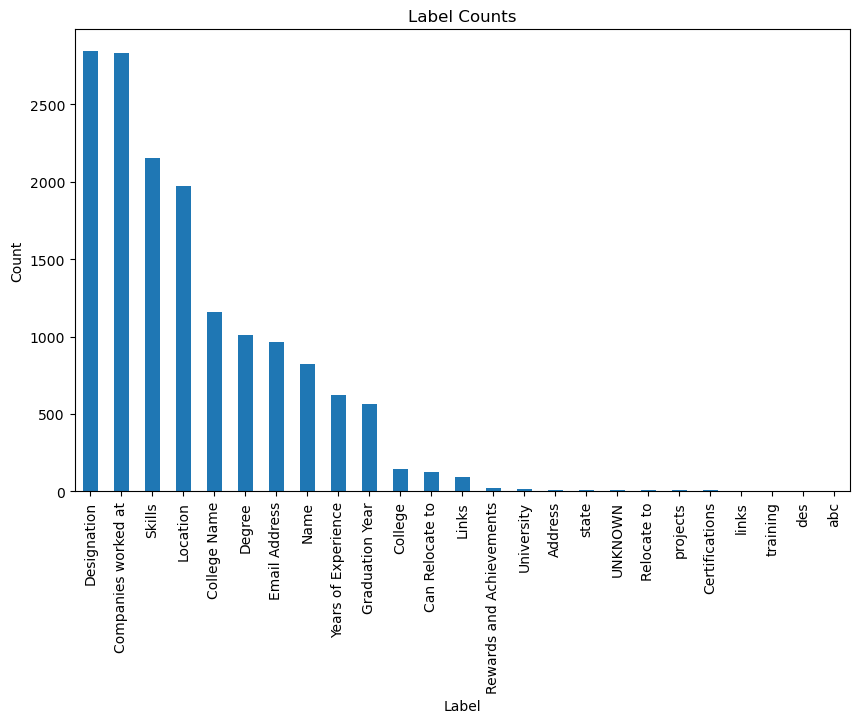

In [24]:
# Plot the label counts
plt.figure(figsize=(10, 6))
label_counts.plot(kind='bar')
plt.title('Label Counts')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

In [60]:
# Extract text values for the label 
exp_texts = []
for row in train_data['annotation']:
    if row is not None:
        for annotation in row:
            if 'label' in annotation and 'text' in annotation['points'][0]:
                if 'Years of Experience' in annotation['label']:   #Years of Experience ,Degree , Companies worked at
                    exp_text = annotation['points'][0]['text']
                    exp_texts.append(exp_text)

In [68]:
#print(exp_texts)

In [72]:
# wordcloud for years of exp, designation, degree
from wordcloud import WordCloud
import matplotlib.pyplot as plt

exp_texts = []
for row in train_data['annotation']:
    if row is not None:
        for annotation in row:
            if 'label' in annotation and 'text' in annotation['points'][0]:
                if 'Years of Experience' in annotation['label']:   #Years of Experience ,Degree , Companies worked at
                    exp_text = annotation['points'][0]['text']
                    exp_texts.append(exp_text)

# Combine all text values into a single string
text_combined = ' '.join(exp_texts)

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_combined)

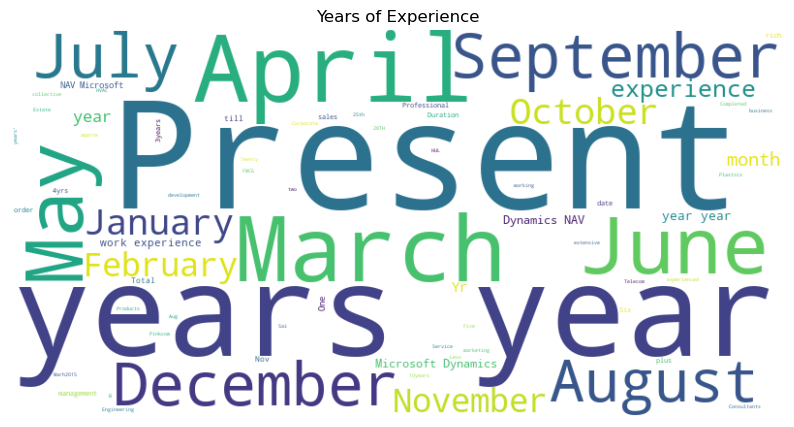

In [73]:
# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Years of Experience')
plt.show()

In [77]:
# wordcloud designation, degree
from wordcloud import WordCloud
import matplotlib.pyplot as plt

exp_texts = []
for row in train_data['annotation']:
    if row is not None:
        for annotation in row:
            if 'label' in annotation and 'text' in annotation['points'][0]:
                if 'Designation' in annotation['label']:   #Years of Experience ,Degree , Companies worked at
                    exp_text = annotation['points'][0]['text']
                    exp_texts.append(exp_text)

# Combine all text values into a single string
text_combined = ' '.join(exp_texts)

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_combined)

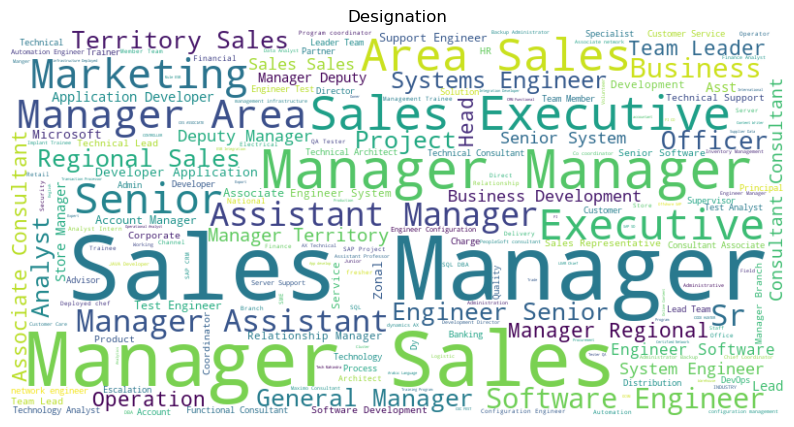

In [78]:
# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Designation')
plt.show()

In [79]:
# wordcloud for degree
from wordcloud import WordCloud
import matplotlib.pyplot as plt

exp_texts = []
for row in train_data['annotation']:
    if row is not None:
        for annotation in row:
            if 'label' in annotation and 'text' in annotation['points'][0]:
                if 'Degree' in annotation['label']:   #Years of Experience ,Degree , Companies worked at
                    exp_text = annotation['points'][0]['text']
                    exp_texts.append(exp_text)

# Combine all text values into a single string
text_combined = ' '.join(exp_texts)

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_combined)

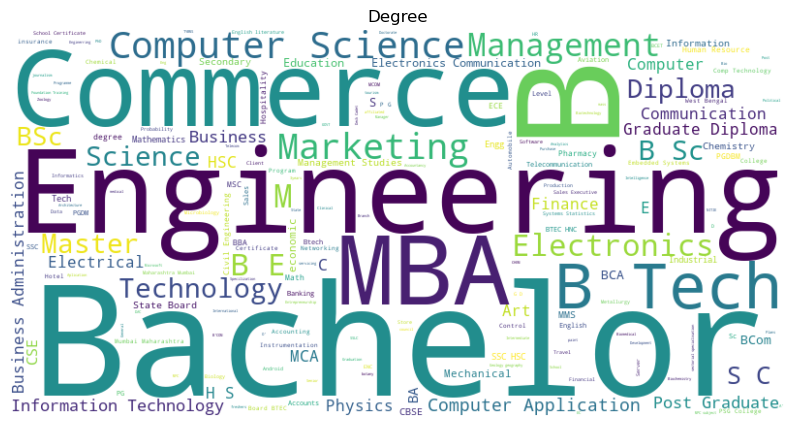

In [80]:
# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Degree')
plt.show()

In [304]:
#!pip install spacy_transformers
!pip install -U spacy

In [305]:
import spacy
from spacy.tokens import DocBin
from tqdm import tqdm

In [85]:
import json

In [95]:
# Specify the path to your JSON file
json_file_path = "./model_train/traindata.json"

# Load the JSON file
with open(json_file_path, 'r', encoding='utf-8') as f:
    resume_data = json.load(f)

JSONDecodeError: Extra data: line 2 column 1 (char 3148)

In [113]:
resume_data = []

# Load the JSON file line by line
with open(json_file_path, 'r', encoding='utf-8') as f:
    for line in f:
        try:
            # Process each line as JSON
            json_data = json.loads(line)
            resume_data.append(json_data)
        except json.JSONDecodeError:
            # Handle any JSON decoding errors
            print(f"Failed to decode JSON line: {line}")

In [114]:
len(resume_data)

701

In [333]:
!python -m spacy init fill-config ./model_train/base_config.cfg ./model_train/config.cfg

[+] Auto-filled config with all values
[+] Saved config
model_train\config.cfg
You can now add your data and train your pipeline:
python -m spacy train config.cfg --paths.train ./train.spacy --paths.dev ./dev.spacy


In [104]:
resume_data[0]

{'content': 'Afreen Jamadar\nActive member of IIIT Committee in Third year\n\nSangli, Maharashtra - Email me on Indeed: indeed.com/r/Afreen-Jamadar/8baf379b705e37c6\n\nI wish to use my knowledge, skills and conceptual understanding to create excellent team\nenvironments and work consistently achieving organization objectives believes in taking initiative\nand work to excellence in my work.\n\nWORK EXPERIENCE\n\nActive member of IIIT Committee in Third year\n\nCisco Networking -  Kanpur, Uttar Pradesh\n\norganized by Techkriti IIT Kanpur and Azure Skynet.\nPERSONALLITY TRAITS:\n• Quick learning ability\n• hard working\n\nEDUCATION\n\nPG-DAC\n\nCDAC ACTS\n\n2017\n\nBachelor of Engg in Information Technology\n\nShivaji University Kolhapur -  Kolhapur, Maharashtra\n\n2016\n\nSKILLS\n\nDatabase (Less than 1 year), HTML (Less than 1 year), Linux. (Less than 1 year), MICROSOFT\nACCESS (Less than 1 year), MICROSOFT WINDOWS (Less than 1 year)\n\nADDITIONAL INFORMATION\n\nTECHNICAL SKILLS:\n\n• 

In [121]:
resume_data[0]['annotation'][0]

{'label': ['Email Address'],
 'points': [{'start': 1155,
   'end': 1198,
   'text': 'indeed.com/r/Afreen-Jamadar/8baf379b705e37c6'}]}

In [158]:
print(len(entities))

6


In [310]:
import json
import logging
import re
import itertools
import spacy
from spacy.tokens import DocBin, Span

def check(t1, l1):
    _range = list(itertools.chain(*[list(range(i[0], i[1])) for i in l1]))
    if set(list(range(t1[0], t1[1]))).intersection(_range):
        return False
    return True

def trim_entity_spans(data: list) -> list:
    """Removes leading and trailing white spaces from entity spans.

    Args:
        data (list): The data to be cleaned in spaCy JSON format.

    Returns:
        list: The cleaned data.
    """
    invalid_span_tokens = re.compile(r'\s')

    cleaned_data = []
    for text, annotations in data:
        entities = annotations['entities']
        valid_entities = []
        for start, end, label in entities:
            valid_start = start
            valid_end = end
            while valid_start < len(text) and invalid_span_tokens.match(text[valid_start]):
                valid_start += 1
            while valid_end > 1 and invalid_span_tokens.match(text[valid_end - 1]):
                valid_end -= 1
            valid_entities.append([valid_start, valid_end, label])
        cleaned_data.append([text, {"entities": valid_entities}])

    return cleaned_data

def convert_dataturks_to_spacy(dataturks_JSON_FilePath):
    try:
        training_data = []
        lines = []
        with open(dataturks_JSON_FilePath, 'r', encoding="utf8") as f:
            lines = f.readlines()

        for line in lines:
            data = json.loads(line)
            text = data['content']
            entities = []
            l1 = []
            if data['annotation'] is not None:
                for annotation in data['annotation']:
                    if 'label' in annotation and annotation['label'] and annotation['label'][0] in ['Years of Experience', 'Degree', 'Designation']:
                        point = annotation['points'][0]
                        if check((point['start'], point['end']), l1):
                            l1.append((point['start'], point['end']))
                            labels = annotation['label']
                            if not isinstance(labels, list):
                                labels = [labels]

                            for label in labels:
                                entities.append((
                                    point['start'],
                                    point['end'] + 1,
                                    label
                                ))
            if entities != []:
                training_data.append((text, {"entities": entities}))
        return training_data
    except Exception:
        logging.exception("Unable to process " + dataturks_JSON_FilePath)
        return None


In [311]:
TRAIN_DATA = trim_entity_spans(convert_dataturks_to_spacy("./model_train/traindata.json"))
#TRAIN_DATA = convert_dataturks_to_spacy("./model_train/traindata.json")

In [312]:
print(TRAIN_DATA)

[['Afreen Jamadar\nActive member of IIIT Committee in Third year\n\nSangli, Maharashtra - Email me on Indeed: indeed.com/r/Afreen-Jamadar/8baf379b705e37c6\n\nI wish to use my knowledge, skills and conceptual understanding to create excellent team\nenvironments and work consistently achieving organization objectives believes in taking initiative\nand work to excellence in my work.\n\nWORK EXPERIENCE\n\nActive member of IIIT Committee in Third year\n\nCisco Networking -  Kanpur, Uttar Pradesh\n\norganized by Techkriti IIT Kanpur and Azure Skynet.\nPERSONALLITY TRAITS:\n• Quick learning ability\n• hard working\n\nEDUCATION\n\nPG-DAC\n\nCDAC ACTS\n\n2017\n\nBachelor of Engg in Information Technology\n\nShivaji University Kolhapur -  Kolhapur, Maharashtra\n\n2016\n\nSKILLS\n\nDatabase (Less than 1 year), HTML (Less than 1 year), Linux. (Less than 1 year), MICROSOFT\nACCESS (Less than 1 year), MICROSOFT WINDOWS (Less than 1 year)\n\nADDITIONAL INFORMATION\n\nTECHNICAL SKILLS:\n\n• Programmin

In [313]:
def trim_entity_spans1(data: list) -> list:
    """Removes leading and trailing white spaces from entity spans.
    Args:
        data (list): The data to be cleaned in spaCy JSON format.
    Returns:
        list: The cleaned data.
    """
    invalid_span_tokens = re.compile(r'\s')

    cleaned_data = []
    for text, annotations in data:
        entities = annotations['entities']
        valid_entities = []
        for start, end, label in entities:
            valid_start = start
            valid_end = end if end <= len(text) else len(text)
            try:
              while valid_start < len(text) and invalid_span_tokens.match(
                      text[valid_start]):
                  valid_start += 1
              while valid_end > 1 and invalid_span_tokens.match(
                      text[valid_end - 1]):
                  valid_end -= 1
            except Exception as e:
              print(text,"\n"*2,len(text), valid_start, valid_end)
              raise e
            valid_entities.append([valid_start, valid_end, label])
        cleaned_data.append([text, {'entities': valid_entities}])
    return cleaned_data

In [314]:
DATA= trim_entity_spans1(TRAIN_DATA)

In [315]:
TRAIN_DATA[0]

['Afreen Jamadar\nActive member of IIIT Committee in Third year\n\nSangli, Maharashtra - Email me on Indeed: indeed.com/r/Afreen-Jamadar/8baf379b705e37c6\n\nI wish to use my knowledge, skills and conceptual understanding to create excellent team\nenvironments and work consistently achieving organization objectives believes in taking initiative\nand work to excellence in my work.\n\nWORK EXPERIENCE\n\nActive member of IIIT Committee in Third year\n\nCisco Networking -  Kanpur, Uttar Pradesh\n\norganized by Techkriti IIT Kanpur and Azure Skynet.\nPERSONALLITY TRAITS:\n• Quick learning ability\n• hard working\n\nEDUCATION\n\nPG-DAC\n\nCDAC ACTS\n\n2017\n\nBachelor of Engg in Information Technology\n\nShivaji University Kolhapur -  Kolhapur, Maharashtra\n\n2016\n\nSKILLS\n\nDatabase (Less than 1 year), HTML (Less than 1 year), Linux. (Less than 1 year), MICROSOFT\nACCESS (Less than 1 year), MICROSOFT WINDOWS (Less than 1 year)\n\nADDITIONAL INFORMATION\n\nTECHNICAL SKILLS:\n\n• Programming

In [316]:
DATA[0]

['Afreen Jamadar\nActive member of IIIT Committee in Third year\n\nSangli, Maharashtra - Email me on Indeed: indeed.com/r/Afreen-Jamadar/8baf379b705e37c6\n\nI wish to use my knowledge, skills and conceptual understanding to create excellent team\nenvironments and work consistently achieving organization objectives believes in taking initiative\nand work to excellence in my work.\n\nWORK EXPERIENCE\n\nActive member of IIIT Committee in Third year\n\nCisco Networking -  Kanpur, Uttar Pradesh\n\norganized by Techkriti IIT Kanpur and Azure Skynet.\nPERSONALLITY TRAITS:\n• Quick learning ability\n• hard working\n\nEDUCATION\n\nPG-DAC\n\nCDAC ACTS\n\n2017\n\nBachelor of Engg in Information Technology\n\nShivaji University Kolhapur -  Kolhapur, Maharashtra\n\n2016\n\nSKILLS\n\nDatabase (Less than 1 year), HTML (Less than 1 year), Linux. (Less than 1 year), MICROSOFT\nACCESS (Less than 1 year), MICROSOFT WINDOWS (Less than 1 year)\n\nADDITIONAL INFORMATION\n\nTECHNICAL SKILLS:\n\n• Programming

In [317]:
data = [[text.replace('\n',' '), annotations] for text, annotations in DATA]


In [318]:
data[3][0]

'arjun ks Senior Program coordinator - oracle India Limited  Bangalore City, Karnataka - Email me on Indeed: indeed.com/r/arjun-ks/8e9247624a5095b4  Seeking a position in a company where I can use my familiarity of the field and my educational background for the profit of the company. My individuality as well as past know-how should help me in causative to the overall intensification of the company.  Snaps  Expertise, Certification and Training  ☑ I am a Post Graduate in MBA with a total work experience of 6.8 years ☑ 3.3 years in IT. Currently working as a Senior Program coordinator. 3.5 years in BPO voice support, ☑ Good work ethics with excellent communication and interpersonal skills. ☑ Capable to delve into the new leading Technologies. ☑ Pro active and self starter with the great ability of leadership. ☑ Ability to work well in both a team environment and individually. ☑ Able to handle multiple projects under tight deadlines. ☑ Able to develop excellent rapport with peers, profes

In [319]:
#' '.join(data[0][0].split())


In [340]:
def get_spacy_doc (file, data):
    nlp = spacy.blank('en')
    db = DocBin ()
    for text, annot in tqdm(data):
        doc = nlp.make_doc(text)
        annot = annot['entities']
        
        ents = []
        entity_indices=[]
        # check for overlap , skip if there is a overlap
        for start, end, label in annot:
            skip_entity = False
            for idx in range (start, end):
                if idx in entity_indices:
                    skip_entity=True
                    break
            if skip_entity==True:
                continue
                
            entity_indices = entity_indices + list (range (start, end))

            try:
                span= doc.char_span (start, end, label=label, alignment_mode= 'contract')
            except:
                continue

            if span is None:
                err_data = str([start, end]) +"  "+ str(text) + "\n"
                #file.write(err_data)
                pass
            else:
                ents.append(span)
        try:
            doc.ents = ents
            db.add(doc)
        except:
            pass
    return db

In [341]:
file = open('error.txt', 'w')
db = get_spacy_doc(file, data)


100%|███████████████████████████████████████████████████████████████████████████████| 684/684 [00:04<00:00, 158.06it/s]


In [342]:
db.to_disk('./model_train/train_data.spacy')

In [ ]:
#from sklearn.model_selection import train_test_split
#train, test = train_test_split(cv_data, test_size=0.3) 
#len(train), len(test)

In [323]:
len(db.tokens)

684

In [324]:
#!pip install cupy

In [332]:
spacy.__version__

'3.5.3'

In [331]:
!python -m spacy debug data ./model_train/config.cfg


============================ Data file validation ============================


Traceback (most recent call last):
  File "C:\Users\manth\anaconda3\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\manth\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\manth\anaconda3\lib\site-packages\spacy\__main__.py", line 4, in <module>
    setup_cli()
  File "C:\Users\manth\anaconda3\lib\site-packages\spacy\cli\_util.py", line 74, in setup_cli
    command(prog_name=COMMAND)
  File "C:\Users\manth\anaconda3\lib\site-packages\click\core.py", line 1128, in __call__
    return self.main(*args, **kwargs)
  File "C:\Users\manth\anaconda3\lib\site-packages\typer\core.py", line 778, in main
    return _main(
  File "C:\Users\manth\anaconda3\lib\site-packages\typer\core.py", line 216, in _main
    rv = self.invoke(ctx)
  File "C:\Users\manth\anaconda3\lib\site-packages\click\core.py", line 1659, in invoke
    return _process_result(sub_ctx.command.invoke(sub_ctx))
  File "C:\Users

In [336]:
!python -m spacy train ./model_train/config.cfg --output ./model_train/output --paths.train ./model_train/train_data.spacy 

[i] Saving to output directory: model_train\output
[i] Using CPU

=========================== Initializing pipeline ===========================


[2023-06-10 11:26:07,164] [INFO] Set up nlp object from config
Traceback (most recent call last):
  File "C:\Users\manth\anaconda3\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\manth\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\manth\anaconda3\lib\site-packages\spacy\__main__.py", line 4, in <module>
    setup_cli()
  File "C:\Users\manth\anaconda3\lib\site-packages\spacy\cli\_util.py", line 74, in setup_cli
    command(prog_name=COMMAND)
  File "C:\Users\manth\anaconda3\lib\site-packages\click\core.py", line 1128, in __call__
    return self.main(*args, **kwargs)
  File "C:\Users\manth\anaconda3\lib\site-packages\typer\core.py", line 778, in main
    return _main(
  File "C:\Users\manth\anaconda3\lib\site-packages\typer\core.py", line 216, in _main
    rv = self.invoke(ctx)
  File "C:\Users\manth\anaconda3\lib\site-packages\click\core.py", line 1659, in invoke
    return _p